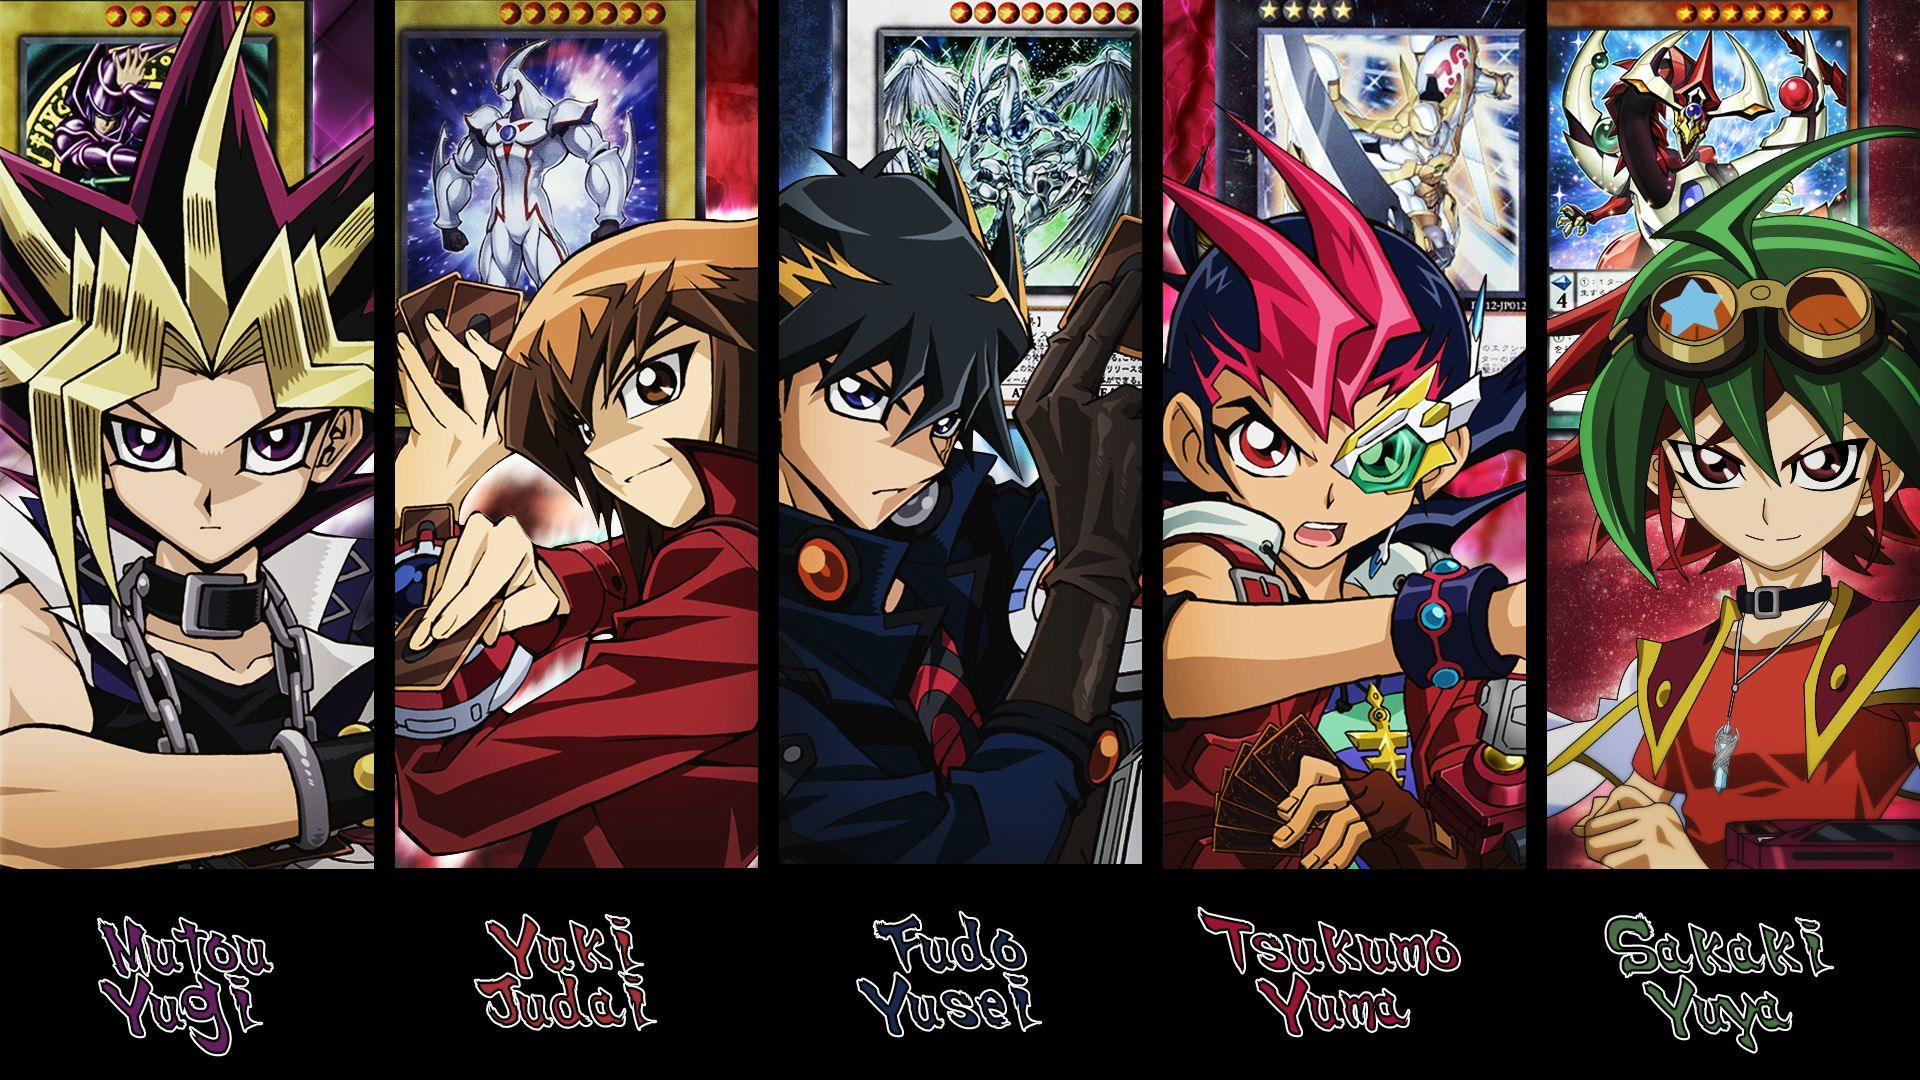

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
plt.style.use('fivethirtyeight')

In [3]:
Cards = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/card_data.csv')
Cards.head()

Name                 Type  ...     ATK     DEF
0             Limit Reverse            Trap Card  ...     NaN     NaN
1            The 13th Grave       Normal Monster  ...  1200.0   900.0
2           Gem-Enhancement            Trap Card  ...     NaN     NaN
3         Magician's Circle            Trap Card  ...     NaN     NaN
4  Castle of Dark Illusions  Flip Effect Monster  ...   920.0  1930.0

[5 rows x 7 columns]

# ***Data Exploring***

In [4]:
Cards.drop_duplicates()

Name                     Type  ...     ATK     DEF
0                       Limit Reverse                Trap Card  ...     NaN     NaN
1                      The 13th Grave           Normal Monster  ...  1200.0   900.0
2                     Gem-Enhancement                Trap Card  ...     NaN     NaN
3                   Magician's Circle                Trap Card  ...     NaN     NaN
4            Castle of Dark Illusions      Flip Effect Monster  ...   920.0  1930.0
...                               ...                      ...  ...     ...     ...
6518                   Cyberdark Claw           Effect Monster  ...  1600.0   800.0
6519                Cyberdark Inferno               Spell Card  ...     NaN     NaN
6520                       Lost World               Spell Card  ...     NaN     NaN
6521  Performapal Odd-Eyes Minitaurus  Pendulum Effect Monster  ...  1200.0  1600.0
6522              Infernity Patriarch           Effect Monster  ...  1000.0  2000.0

[6449 rows x 7 columns]

In [5]:
Cards.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6529     True
6530     True
6531     True
6532     True
6533     True
Length: 6534, dtype: bool

In [6]:
Cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6534 entries, 0 to 6533
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       6534 non-null   object 
 1   Type       6534 non-null   object 
 2   Level      4275 non-null   float64
 3   Race       6534 non-null   object 
 4   Attribute  4275 non-null   object 
 5   ATK        4275 non-null   float64
 6   DEF        4275 non-null   float64
dtypes: float64(3), object(4)
memory usage: 357.5+ KB


In [7]:
Cards.isnull().sum()

Name            0
Type            0
Level        2259
Race            0
Attribute    2259
ATK          2259
DEF          2259
dtype: int64

In [8]:
another1 = Cards.loc[Cards['Level'].isnull(),['Race']].value_counts()
another1

Race        
Normal          1126
Continuous       445
Quick-Play       187
Equip            161
Field            120
Counter           89
Ritual            44
Fiend             17
Beast             14
Plant             12
Machine            9
Fairy              5
Warrior            4
Insect             3
Zombie             3
Pyro               3
Winged Beast       3
Aqua               3
Rock               2
Dinosaur           2
Spellcaster        2
Thunder            2
Wyrm               1
Reptile            1
Dragon             1
dtype: int64

In [9]:
Cards.fillna(value=0, inplace=True)

In [10]:
Cards.dtypes

Name          object
Type          object
Level        float64
Race          object
Attribute     object
ATK          float64
DEF          float64
dtype: object

In [11]:
Cards = Cards.drop_duplicates()

# Converting Data and Replacing Values 

In [12]:
convert_dict = {'ATK': int, 
                'Level': int,
                'DEF': int
               }
Cards = Cards.astype(convert_dict)

In [13]:
Cards

Name                     Type  ...   ATK   DEF
0                       Limit Reverse                Trap Card  ...     0     0
1                      The 13th Grave           Normal Monster  ...  1200   900
2                     Gem-Enhancement                Trap Card  ...     0     0
3                   Magician's Circle                Trap Card  ...     0     0
4            Castle of Dark Illusions      Flip Effect Monster  ...   920  1930
...                               ...                      ...  ...   ...   ...
6518                   Cyberdark Claw           Effect Monster  ...  1600   800
6519                Cyberdark Inferno               Spell Card  ...     0     0
6520                       Lost World               Spell Card  ...     0     0
6521  Performapal Odd-Eyes Minitaurus  Pendulum Effect Monster  ...  1200  1600
6522              Infernity Patriarch           Effect Monster  ...  1000  2000

[6449 rows x 7 columns]

In [14]:
Cards['Attribute'] = Cards['Attribute'].replace(0, 'Other')

In [15]:
Cards['Attribute'] = Cards['Attribute'].replace('', 'Other')
Cards

Name                     Type  ...   ATK   DEF
0                       Limit Reverse                Trap Card  ...     0     0
1                      The 13th Grave           Normal Monster  ...  1200   900
2                     Gem-Enhancement                Trap Card  ...     0     0
3                   Magician's Circle                Trap Card  ...     0     0
4            Castle of Dark Illusions      Flip Effect Monster  ...   920  1930
...                               ...                      ...  ...   ...   ...
6518                   Cyberdark Claw           Effect Monster  ...  1600   800
6519                Cyberdark Inferno               Spell Card  ...     0     0
6520                       Lost World               Spell Card  ...     0     0
6521  Performapal Odd-Eyes Minitaurus  Pendulum Effect Monster  ...  1200  1600
6522              Infernity Patriarch           Effect Monster  ...  1000  2000

[6449 rows x 7 columns]

# Counting Unique Values:

In [16]:
Cards['Attribute'].unique()

array(['Other', 'DARK', 'FIRE', 'EARTH', 'WIND', 'LIGHT', 'WATER',
       'DIVINE'], dtype=object)

In [17]:
Cards['Type'].unique()

array(['Trap Card', 'Normal Monster', 'Flip Effect Monster',
       'Effect Monster', 'Spell Card', 'Tuner Monster', 'Token',
       'Synchro Monster', 'XYZ Monster', 'Pendulum Effect Monster',
       'Fusion Monster', 'Normal Tuner Monster', 'Spirit Monster',
       'Union Effect Monster', 'Ritual Monster', 'Ritual Effect Monster',
       'Gemini Monster', 'Toon Monster', 'Pendulum Normal Monster',
       'Pendulum Flip Effect Monster', 'Synchro Tuner Monster',
       'XYZ Pendulum Effect Monster', 'Pendulum Tuner Effect Monster',
       'Synchro Pendulum Effect Monster'], dtype=object)

In [18]:
Cards['Level'].unique()

array([ 0,  3,  4,  8,  6,  5,  2,  1, 10,  9, 12,  7, 11])

In [19]:
#This is to see how many trap cards are in this data set
Cards['Type'].value_counts()

Effect Monster                     2474
Spell Card                         1171
Trap Card                           986
Normal Monster                      508
Tuner Monster                       234
Fusion Monster                      217
Synchro Monster                     209
XYZ Monster                         169
Flip Effect Monster                 117
Pendulum Effect Monster             103
Token                                77
Ritual Effect Monster                36
Gemini Monster                       33
Pendulum Normal Monster              25
Union Effect Monster                 23
Spirit Monster                       22
Ritual Monster                       12
Toon Monster                         11
Synchro Tuner Monster                10
Normal Tuner Monster                  8
Pendulum Flip Effect Monster          1
XYZ Pendulum Effect Monster           1
Pendulum Tuner Effect Monster         1
Synchro Pendulum Effect Monster       1
Name: Type, dtype: int64

# Creating a new Dataframes for use:

In [20]:
#Creating a new data frame from the main one
df = Cards[['Name','Type','Race', 'Attribute']]
df

Name  ... Attribute
0                       Limit Reverse  ...     Other
1                      The 13th Grave  ...      DARK
2                     Gem-Enhancement  ...     Other
3                   Magician's Circle  ...     Other
4            Castle of Dark Illusions  ...      DARK
...                               ...  ...       ...
6518                   Cyberdark Claw  ...      DARK
6519                Cyberdark Inferno  ...     Other
6520                       Lost World  ...     Other
6521  Performapal Odd-Eyes Minitaurus  ...      DARK
6522              Infernity Patriarch  ...      DARK

[6449 rows x 4 columns]

In [21]:
df_Stats = Cards[['Level', 'ATK', 'DEF']]
df_Stats

Level   ATK   DEF
0         0     0     0
1         3  1200   900
2         0     0     0
3         0     0     0
4         4   920  1930
...     ...   ...   ...
6518      3  1600   800
6519      0     0     0
6520      0     0     0
6521      4  1200  1600
6522      4  1000  2000

[6449 rows x 3 columns]

# Basic Graphing:

These basic graphs are to give us an idea of the cards avaiable in the data set currently, and the types of cards in the data set.

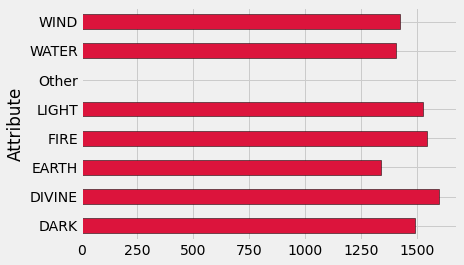

In [22]:
Cards.groupby('Attribute')['ATK'].mean().plot(kind='barh', color= 'Crimson', edgecolor='black');
#Shows the ATTCK for each Attribute

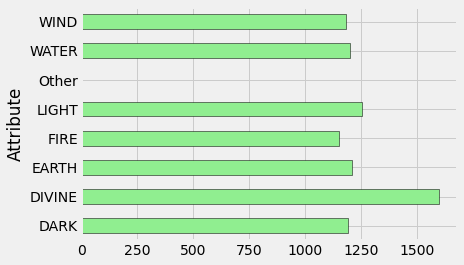

In [23]:
Cards.groupby('Attribute')['DEF'].mean().plot(kind='barh', color= 'lightgreen', edgecolor='black');
#Shows the DEF for each Attribute

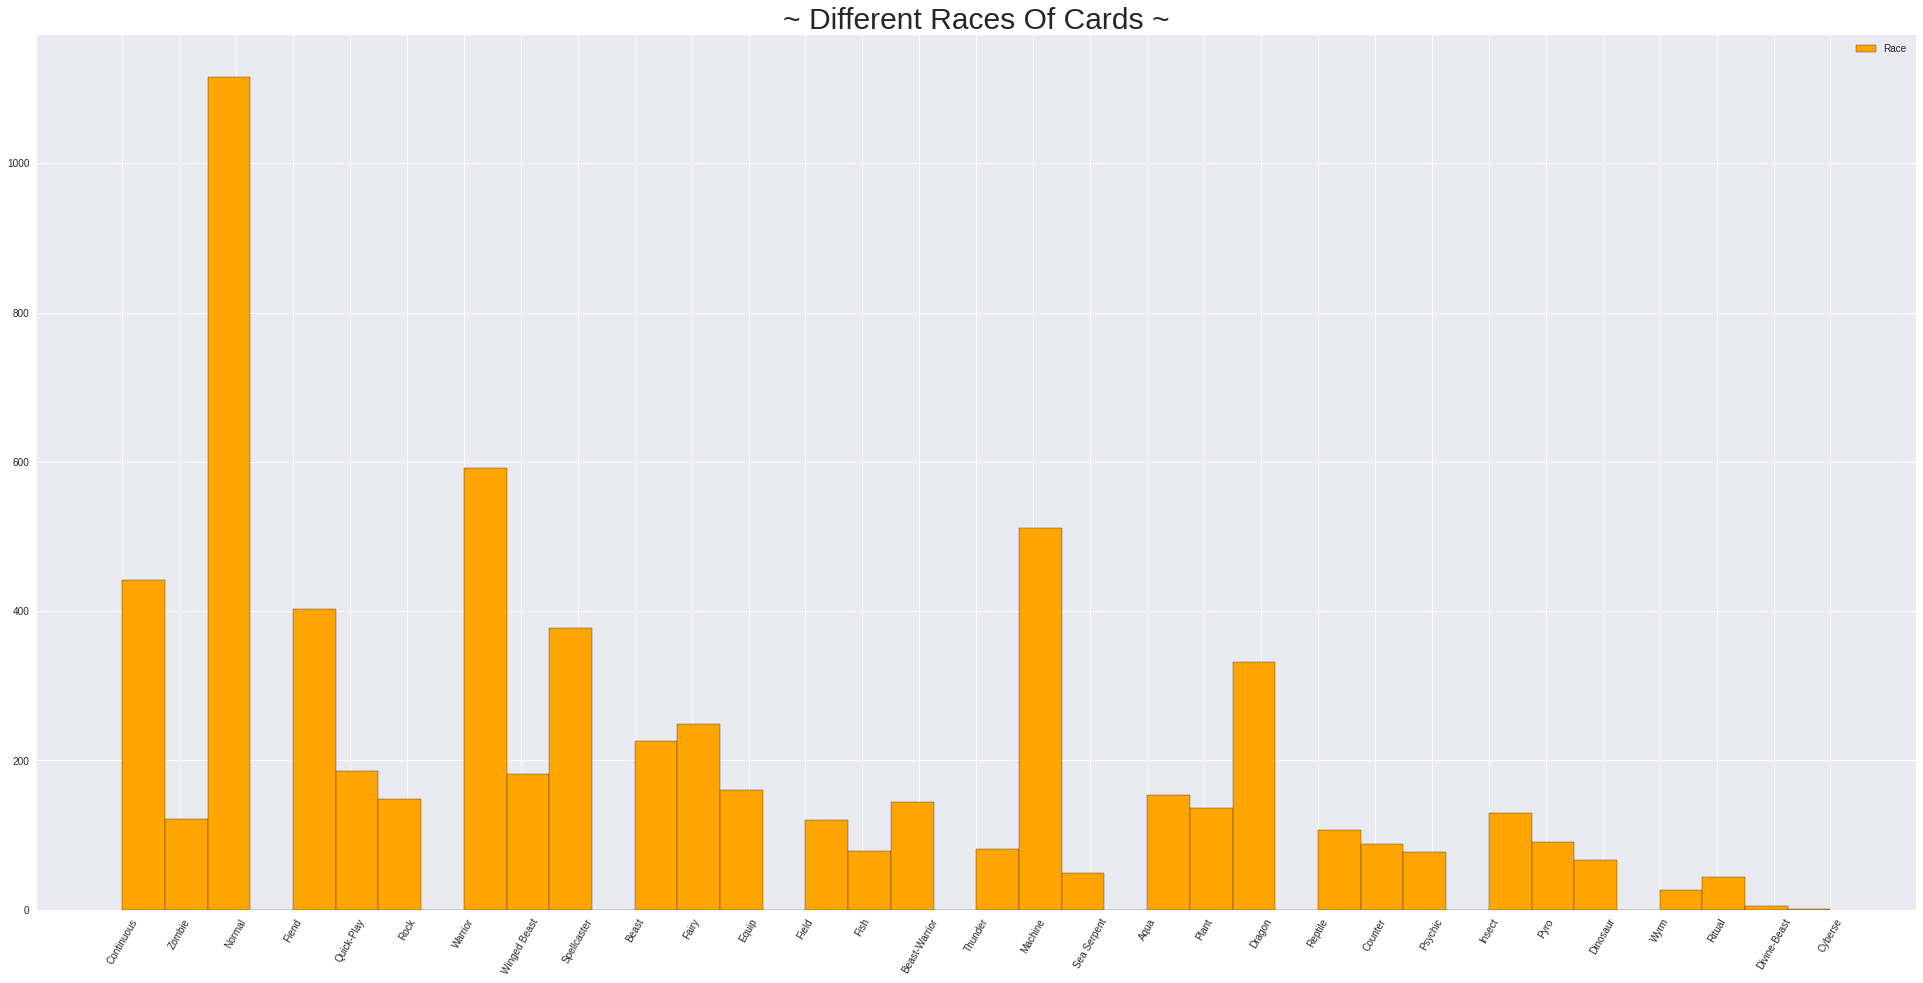

In [24]:
plt.style.use('seaborn')
Cards['Race'].hist(bins = 40,
  edgecolor='black', label='Race', color='orange', figsize=(30,15));
plt.xticks(rotation = 60);
plt.title('~ Different Races Of Cards ~', fontsize = 30);
plt.legend();

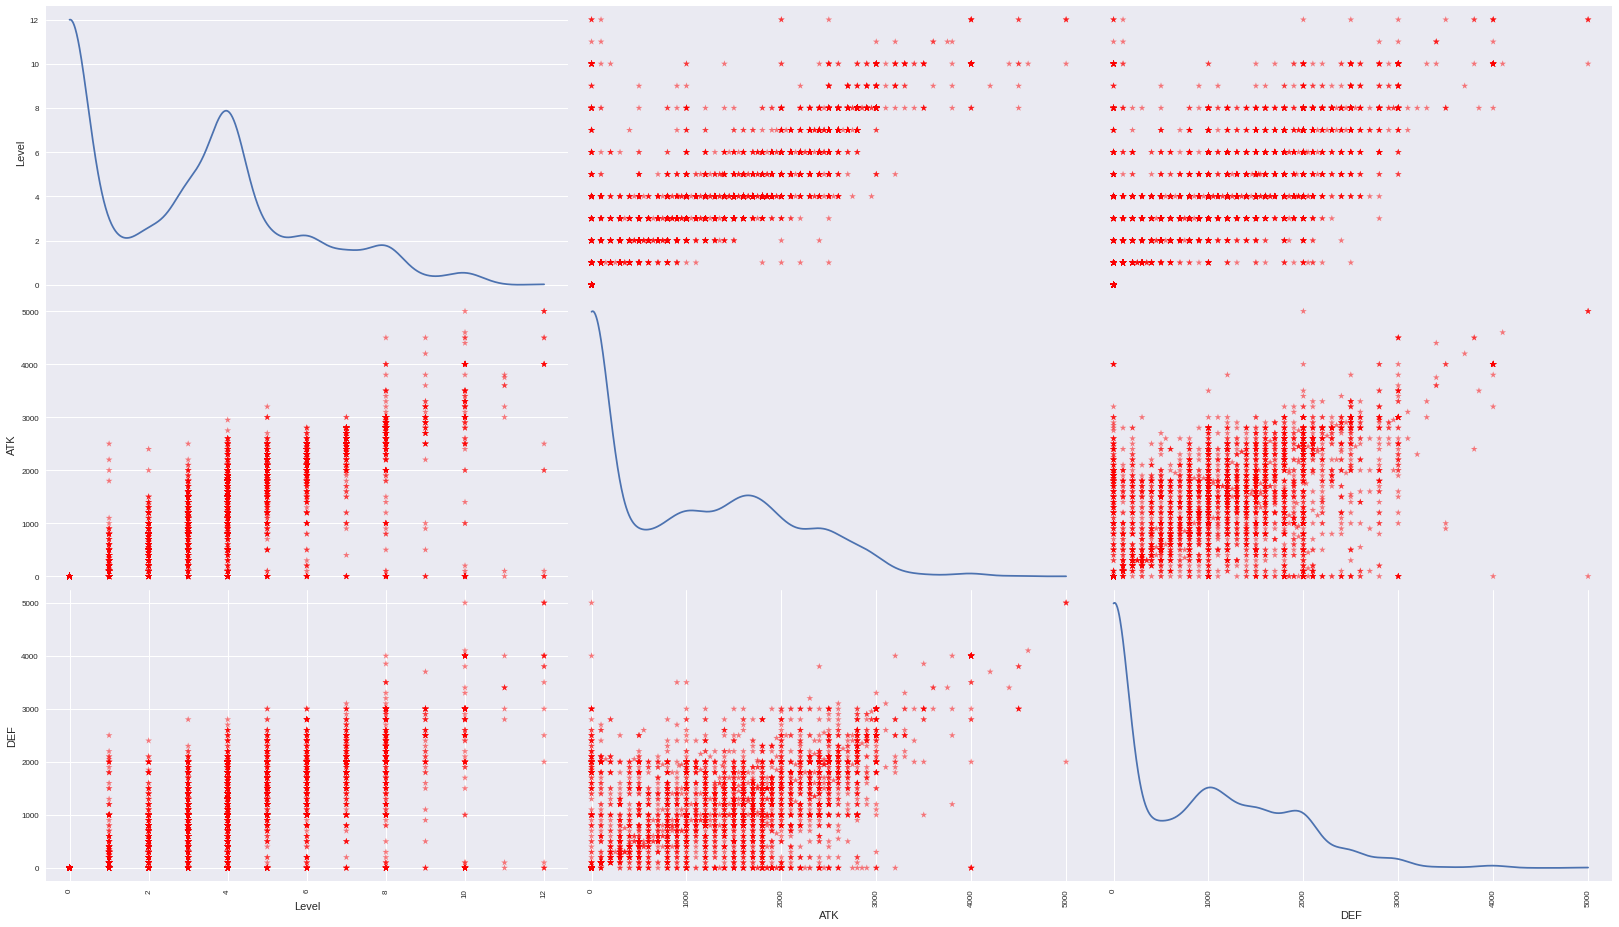

In [25]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
scatter_matrix(Cards, figsize=(25,15), grid=False, marker='*', diagonal='kde', range_padding=0.1, color= 'red')
pyplot.show()

# Machine Learning 

In [26]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import kneighbors_graph
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
X = df_Stats.loc[:, ['ATK',
           'DEF']]
y = df_Stats['Level']

In [28]:
X.shape

(6449, 2)

In [29]:
y.shape

(6449,)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4836, 2), (1613, 2), (4836,), (1613,))

In [32]:
y_test.value_counts(normalize = True)

0     0.340360
4     0.199628
3     0.110353
6     0.061996
5     0.057037
2     0.057037
1     0.051457
8     0.045257
7     0.042157
10    0.016119
9     0.014259
12    0.002480
11    0.001860
Name: Level, dtype: float64

In [33]:
# Standardize Data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
#peaking at the data
print(X_train)

[[-0.94647386 -0.91133271]
 [ 0.26176672  0.01331233]
 [ 0.96657372 -0.91133271]
 ...
 [-0.94647386 -0.91133271]
 [-0.94647386 -0.91133271]
 [ 2.07412759  1.97818302]]


In [35]:
#peaking at the data
print(X_test)

[[-0.94647386 -0.91133271]
 [ 1.67138073  1.16911862]
 [-0.94647386 -0.91133271]
 ...
 [ 2.07412759  2.55608617]
 [-0.94647386 -0.91133271]
 [ 0.86588701  0.24447358]]


In [36]:
#peaking at the data
print(y_train)

1887    0
5918    4
5085    4
3881    0
5911    4
       ..
3408    4
3921    5
3347    0
2610    0
6495    8
Name: Level, Length: 4836, dtype: int64


In [37]:
#peaking at the data
print(y_test)

5168    0
33      6
563     0
4461    4
2799    6
       ..
5324    8
4016    0
6307    8
5867    0
578     4
Name: Level, Length: 1613, dtype: int64


In [38]:
from sklearn.multiclass import OneVsOneClassifier
log_reg = LogisticRegression()
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)

print('Training accuracy:', ovo.score(X_train, y_train));
print('Test accuracy:', ovo.score(X_test, y_test));

Training accuracy: 0.6660463192721258
Test accuracy: 0.6478611283323


In [39]:
cl = LogisticRegression()
cl.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
cl = SVC(kernel="rbf")
cl.fit(X_train,y_train)

cm = confusion_matrix(y_test,cl.predict(X_test))
print(cm)

[[549   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 17  29  25   4   8   0   0   0   0   0   0   0   0]
 [  6   9  60   9   8   0   0   0   0   0   0   0   0]
 [  4   2  26  84  59   0   3   0   0   0   0   0   0]
 [  4   1   5  32 267   0   8   5   0   0   0   0   0]
 [  2   0   0   1  58   0  26   5   0   0   0   0   0]
 [  0   1   0   1  22   0  54  17   5   0   0   0   0]
 [  0   0   0   1   2   0  16  30  19   0   0   0   0]
 [  2   0   0   1   2   0   5   7  54   0   2   0   0]
 [  1   0   0   0   0   0   2   2  16   0   2   0   0]
 [  7   0   0   1   1   0   1   0  11   0   5   0   0]
 [  1   0   0   0   0   0   0   0   1   0   1   0   0]
 [  0   1   0   0   0   0   0   0   0   0   3   0   0]]


In [41]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
model = log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.5581058726220016
Test accuracy: 0.5387476751394916


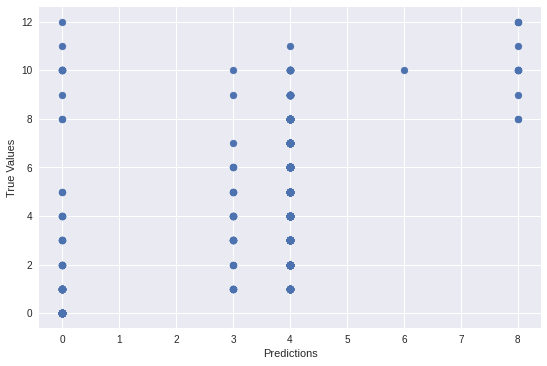

In [42]:
plt.scatter(predictions, y_test)
plt.xlabel('Predictions');
plt.ylabel('True Values');

In [43]:
y_preds = predictions

In [44]:
print('Score:', model.score(X_test, y_test))

Score: 0.5387476751394916


In [45]:
print('Score:', log_reg.score(X_test, y_test))

Score: 0.5387476751394916


In [46]:
print('Score:', log_reg.score(X_train, y_train))

Score: 0.5581058726220016


In [47]:
# training RMSE
from sklearn.metrics import mean_squared_error
import math
np.sqrt(mean_squared_error(y_train, log_reg.predict(X_train)))


1.8119285842371153

In [48]:
# test RMSE
np.sqrt(mean_squared_error(y_test, log_reg.predict(X_test)))


1.8865859237291958

Cross Val for the model :

In [49]:
#from sklearn.model_selection import cross_val_score, cross_val_predict
#from sklearn import metrics

In [50]:
# Perform 6-fold cross validation
#scores = cross_val_score(model, Cards, y, cv=3)
#print('Cross-validated scores:', scores)

In [51]:
#predictions = cross_val_predict(model, Cards, y, cv=3)
#plt.scatter(y, predictions)

In [52]:
#accuracy = metrics.r2_score(y_test, predictions)
#print('Cross-Predicted Accuracy:', accuracy)

Continued Machine learning :

In [53]:
log_reg.predict_proba(X_test)[:,1]

array([0.06035846, 0.00331395, 0.06035846, ..., 0.00107243, 0.06035846,
       0.01565177])

In [54]:
log_reg.intercept_

array([-25.54206715,  -3.56159986,  -2.79177054,  -2.12225542,
        -1.37581957,  -3.20838361,  -3.33618967,  -4.12727982,
        -4.10115743,  -6.13934914,  -5.3218208 ,  -7.57553834,
        -7.19725879])

In [55]:
log_reg.coef_

array([[-14.59661052, -15.61448228],
       [ -1.06856221,  -0.14122071],
       [ -0.55735477,   0.15477435],
       [ -0.26149009,   0.35414596],
       [  0.44838806,   0.2029817 ],
       [  0.60041279,   0.21643818],
       [  1.05121122,  -0.02052682],
       [  1.04424941,   0.29739927],
       [  1.31421548,   0.37434769],
       [  0.83884666,   0.59475512],
       [  0.99283344,   0.64768197],
       [  0.3059125 ,   0.91034726],
       [  0.4213307 ,   1.08176725]])

In [56]:
log_reg.predict_proba(X_test[0:1])

array([[6.84202154e-01, 6.03584615e-02, 6.12646009e-02, 7.39995780e-02,
        8.93894383e-02, 1.36585711e-02, 9.78802346e-03, 3.37254396e-03,
        2.50259524e-03, 4.19377533e-04, 7.81981568e-04, 1.23937878e-04,
        1.38736861e-04]])

In [57]:
log_reg.predict(X_test[0:100])

array([0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 4, 4, 0, 8, 4, 0, 4, 4, 4, 4, 0, 4,
       4, 0, 0, 4, 4, 4, 4, 0, 0, 3, 4, 4, 0, 4, 0, 3, 0, 4, 4, 0, 4, 4,
       0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 0, 4, 0,
       4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 4, 4])

In [58]:
log_reg.score(X_test, y_test)

0.5387476751394916

#  Linear regression / Kmean

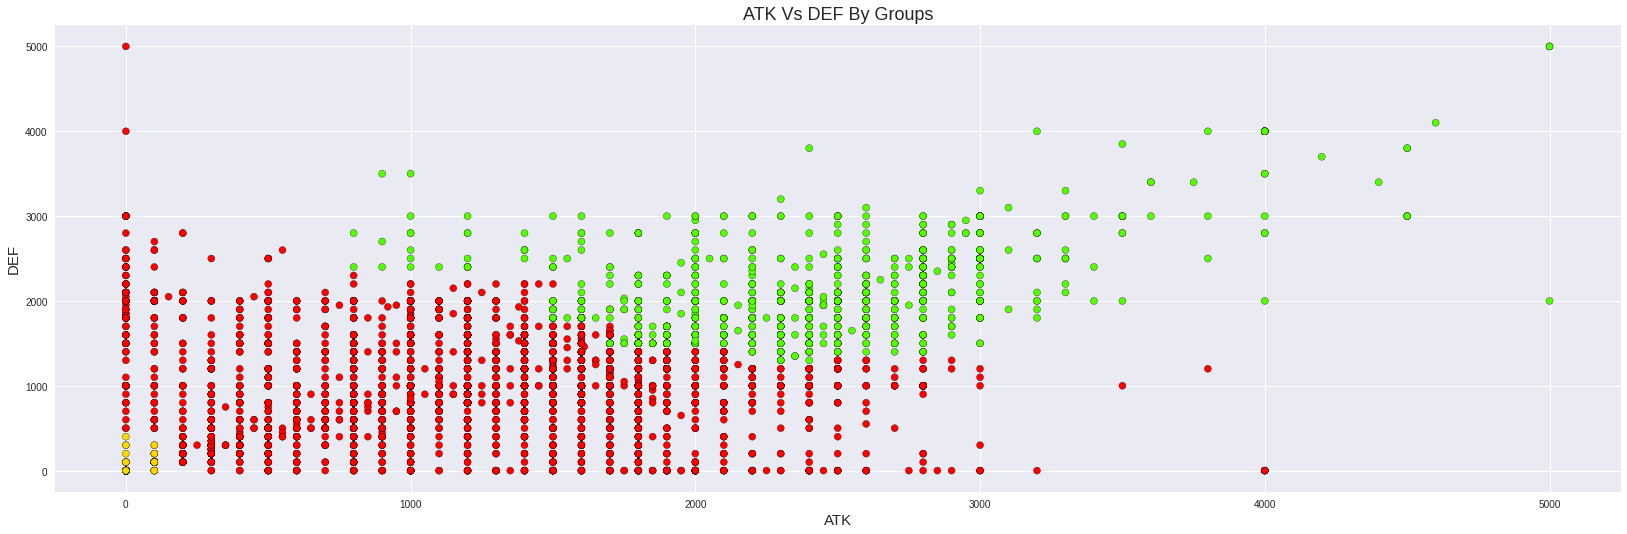

In [59]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
scaled_df = scaler.fit_transform(X)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

hc = AgglomerativeClustering(n_clusters = 3, affinity='euclidean',linkage='ward')
hc.fit(scaled_df)
# Save the cluster lables to the dataframe 
Cards['cluster'] = hc.labels_

plt.style.use('seaborn')
plt.figure(figsize=(25, 8))
plt.scatter(Cards['ATK'], Cards['DEF'], c = (Cards['cluster']), edgecolors='black', facecolors='red', norm=None, cmap='prism')
plt.title('ATK Vs DEF By Groups', fontsize=18);
plt.xlabel('ATK', fontsize=15)
plt.ylabel('DEF', fontsize=15)
plt.show()
#This graph shows the power level of the cards and how far spreadout that they are in comparsion to their current stats without (Buff or Spell cards) in play.

In [60]:
x = pd.DataFrame(Cards['ATK'])
yy = pd.DataFrame(Cards['DEF'])

In [61]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x, yy, test_size=0.25)

In [62]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(4836, 1)
(1613, 1)
(4836, 1)
(1613, 1)


In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, yy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
regressor = LinearRegression().fit(x, yy)

In [65]:
rsq = regressor.score(x, yy)

In [66]:
print('coefficient of determination:', rsq)

coefficient of determination: 0.5312269804978738


In [67]:
print('intercept:', regressor.intercept_)

intercept: [191.31684426]


In [68]:
print('slope:', regressor.coef_)

slope: [[0.63105275]]


In [69]:
y_pred = regressor.predict(x)

In [70]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[[191.31684426]
 [948.58013837]
 [191.31684426]
 ...
 [191.31684426]
 [948.58013837]
 [822.36958936]]


In [71]:
y_pred = regressor.intercept_ + regressor.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
              ATK
0      191.316844
1      948.580138
2      191.316844
3      191.316844
4      771.885370
...           ...
6518  1201.001236
6519   191.316844
6520   191.316844
6521   948.580138
6522   822.369589

[6449 rows x 1 columns]


In [72]:
import statsmodels.api as sm
model = sm.OLS(yy, x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [73]:
x = sm.add_constant(x)

In [74]:
model = sm.OLS(yy, x)

In [75]:
results = model.fit()

In [76]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    DEF   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     7306.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:57:34   Log-Likelihood:                -50315.
No. Observations:                6449   AIC:                         1.006e+05
Df Residuals:                    6447   BIC:                         1.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.3168     10.153     18.844      0.0

In [77]:
#rsquared holds 𝑅²
print('coefficient of determination:', results.rsquared)
print()
#rsquared_adj represents adjusted 𝑅² (𝑅² corrected according to the number of input features)
print('adjusted coefficient of determination:', results.rsquared_adj)
print()
#params refers the array with 𝑏₀, 𝑏₁, and 𝑏₂
print('regression coefficients:', results.params)


coefficient of determination: 0.531226980497874

adjusted coefficient of determination: 0.5311542686909092

regression coefficients: const    191.316844
ATK        0.631053
dtype: float64


In [78]:
print('predicted response:', results.fittedvalues, sep='\n')
print()
print('predicted response:', results.predict(x), sep='\n')

predicted response:
0        191.316844
1        948.580138
2        191.316844
3        191.316844
4        771.885370
           ...     
6518    1201.001236
6519     191.316844
6520     191.316844
6521     948.580138
6522     822.369589
Length: 6449, dtype: float64

predicted response:
0        191.316844
1        948.580138
2        191.316844
3        191.316844
4        771.885370
           ...     
6518    1201.001236
6519     191.316844
6520     191.316844
6521     948.580138
6522     822.369589
Length: 6449, dtype: float64


# The Scatter plot:
Below shows the two different stats compared to level of the card holding that stat, which gives us an idea of how the levels of cards affect the power of the card. But can we go deeper into it?

In [79]:
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (18,4), dpi=1000)
sns.regplot(x='ATK', y='Level', data=Cards, ax = axes[0], scatter_kws={'alpha':0.3}, color='Red', dropna=True);
sns.regplot(x='DEF', y='Level', data=Cards, ax = axes[1], scatter_kws={'alpha':0.3}, color='darkblue',dropna=True);
fig.tight_layout()
#Figure shows the level vs the stats

# Breakdown of Individual Cards:

Castle of Dark Illusions breakdown:
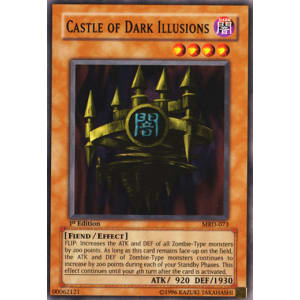

In [80]:
Cards.loc[4]

Name         Castle of Dark Illusions
Type              Flip Effect Monster
Level                               4
Race                            Fiend
Attribute                        DARK
ATK                               920
DEF                              1930
cluster                             0
Name: 4, dtype: object

**As we can see, we can put cards and stats from the data set. If you know the cards name you can get it from the data and see in depth its stats and effects.**

**Effects** : *FLIP: All Zombie-Type monsters gain 200 ATK and DEF. During each of your next 4 Standby Phases, each of those Zombie-Type monsters gains 200 more ATK and DEF. These effects last as long as this card is face-up on the field.*

In [81]:
#Creating a var for the Castle of Dark Illusions
CD_Ill = Cards.loc[4]
#Calling on the var to make sure it is working 
CD_Ill

Name         Castle of Dark Illusions
Type              Flip Effect Monster
Level                               4
Race                            Fiend
Attribute                        DARK
ATK                               920
DEF                              1930
cluster                             0
Name: 4, dtype: object

In [82]:
CD_Ill.shape

(8,)

In [83]:
#Making a new var for the floats and int in  the last variable for graphing 
CD_Stats = (CD_Ill['ATK'] , CD_Ill['DEF'] , CD_Ill['Level'])

In [84]:
print('ATK, DEF, Level')
CD_Stats

ATK, DEF, Level


(920, 1930, 4)

Limit Reverse Card Breakdown: 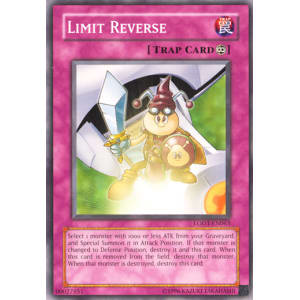

**Effects**:   *Target 1 monster with 1000 or less ATK in your Graveyard; Special Summon it in Attack Position. If the target is changed to Defense Position, destroy it and this card. When this card leaves the field, destroy the target. When the target is destroyed, destroy this card.*

In [85]:
Cards.loc[0]

Name         Limit Reverse
Type             Trap Card
Level                    0
Race            Continuous
Attribute            Other
ATK                      0
DEF                      0
cluster                  1
Name: 0, dtype: object

As we can see the data set is very much, accurate and gives the details of the stats perfectly!

# Keras

In [86]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [87]:
X = df_Stats.loc[:, ['ATK',
           'DEF']]
y = df_Stats['Level']

In [88]:
model = Sequential()
model.add(Dense(12, input_dim= 2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [89]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
645/645 [==============================] - 1s 1ms/step - loss: -2596.5557 - accuracy: 0.0379
Epoch 2/10
645/645 [==============================] - 1s 992us/step - loss: -135352.8132 - accuracy: 0.0419
Epoch 3/10
645/645 [==============================] - 1s 988us/step - loss: -811407.8070 - accuracy: 0.0490
Epoch 4/10
645/645 [==============================] - 1s 997us/step - loss: -2444540.1941 - accuracy: 0.0442
Epoch 5/10
645/645 [==============================] - 1s 1ms/step - loss: -4811386.7341 - accuracy: 0.0464
Epoch 6/10
645/645 [==============================] - 1s 1ms/step - loss: -8364049.2477 - accuracy: 0.0501
Epoch 7/10
645/645 [==============================] - 1s 999us/step - loss: -12740835.9505 - accuracy: 0.0463
Epoch 8/10
645/645 [==============================] - 1s 1ms/step - loss: -18930395.2848 - accuracy: 0.0456
Epoch 9/10
645/645 [==============================] - 1s 1ms/step - loss: -26559824.3282 - accuracy: 0.0430
Epoch 10/10
645/645 [==========

In [91]:
accuracy = model.evaluate(X,y, verbose=1)
print(accuracy)

202/202 [==============================] - 0s 884us/step - loss: -41459400.0000 - accuracy: 0.0454
[-41459400.0, 0.0454334020614624]


In [92]:
predictions = model.predict(X)
#round
rounded = [round(x[0]) for x in predictions]

In [93]:
predictions = model.predict_classes(X)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Tree

In [94]:
x=Cards[["ATK","DEF"]]
y=Cards["Level"]

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=320)

from sklearn.tree import DecisionTreeRegressor
dtreg=DecisionTreeRegressor()
dtreg.fit(x_train,y_train)
print(dtreg.score(x_test, y_test))

0.8218189325085041


In [96]:
for i in range(12,30):
    level=dtreg.predict([[2500,i*100]])[0] 
    print("Defense: ",i*100,"  ",level)

Defense:  1200    6.111111111111111
Defense:  1300    5.0
Defense:  1400    5.666666666666667
Defense:  1500    7.0
Defense:  1600    7.0
Defense:  1700    6.333333333333333
Defense:  1800    6.571428571428571
Defense:  1900    7.0
Defense:  2000    6.869565217391305
Defense:  2100    6.545454545454546
Defense:  2200    5.0
Defense:  2300    7.0
Defense:  2400    4.0
Defense:  2500    7.0
Defense:  2600    4.0
Defense:  2700    8.0
Defense:  2800    7.0
Defense:  2900    10.0


In [97]:
from sklearn.tree import DecisionTreeRegressor
dtregmax2=DecisionTreeRegressor(max_depth=3)
dtregmax2.fit(x_train,y_train)
print(dtregmax2.score(x_test, y_test))

for i in range(12,30):
    level=dtreg.predict([[2500,i*100]])[0] 
    print("Defense: ",i*100,"  ",level)

0.8144476620947865
Defense:  1200    6.111111111111111
Defense:  1300    5.0
Defense:  1400    5.666666666666667
Defense:  1500    7.0
Defense:  1600    7.0
Defense:  1700    6.333333333333333
Defense:  1800    6.571428571428571
Defense:  1900    7.0
Defense:  2000    6.869565217391305
Defense:  2100    6.545454545454546
Defense:  2200    5.0
Defense:  2300    7.0
Defense:  2400    4.0
Defense:  2500    7.0
Defense:  2600    4.0
Defense:  2700    8.0
Defense:  2800    7.0
Defense:  2900    10.0


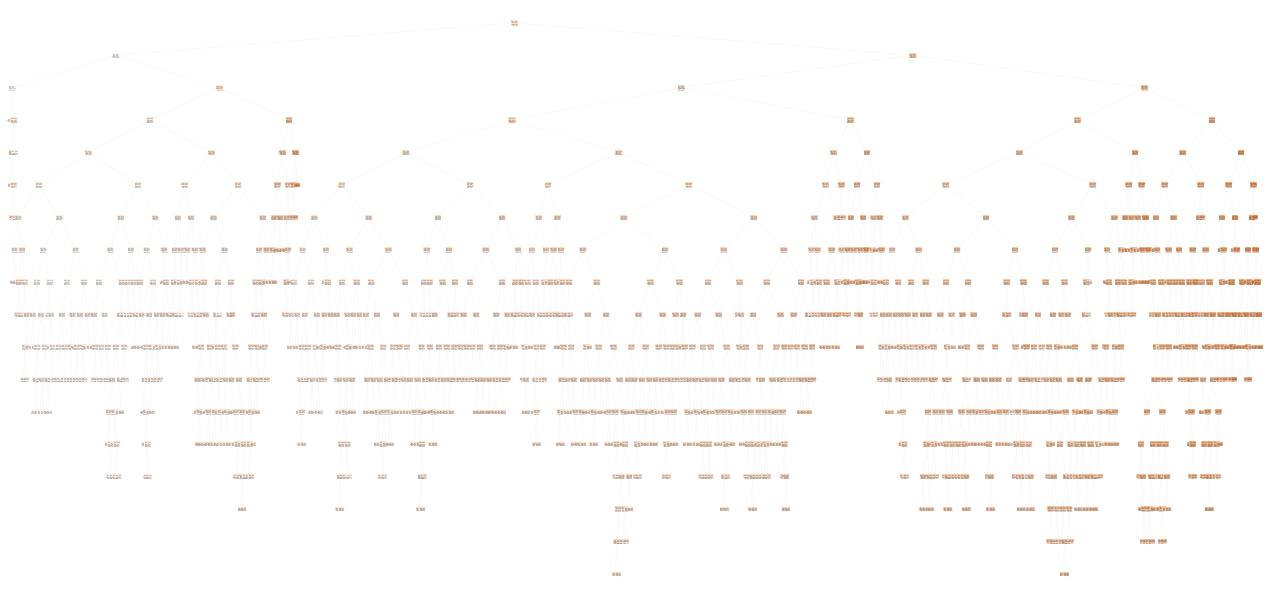

In [98]:
from sklearn import tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtreg,filled=True)  
plt.show()

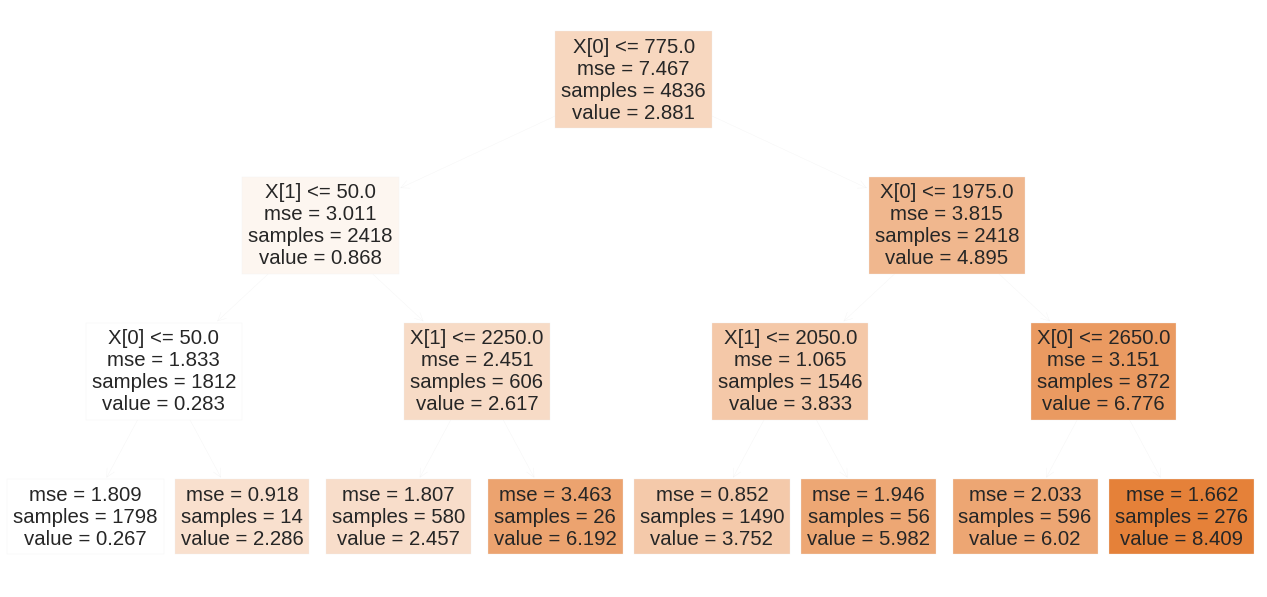

In [99]:
plt.figure(figsize=(20,10))
tree.plot_tree(dtregmax2,filled=True,)
plt.show()

# Searcher System for this data set

In [100]:
#Press this play button to begin the search, then enter a name of a card. NOTE: (Not all cards are in the dataset)
#This is to search for the Cards you want
search_result = []

search_input = input("Please enter a Yugioh Cards Name: ")
Cards[Cards['Name'].str.contains(search_input, na=False)]


Please enter a Yugioh Cards Name: Limit


Name            Type  Level  ...   ATK DEF  cluster
0                  Limit Reverse       Trap Card      0  ...     0   0        1
270         Level Limit - Area B      Spell Card      0  ...     0   0        1
569   Schwarzschild Limit Dragon  Effect Monster      8  ...  2000   0        0
1905             Limiter Removal      Spell Card      0  ...     0   0        1
1916                  Over Limit       Trap Card      0  ...     0   0        1
1936                Summon Limit       Trap Card      0  ...     0   0        1
4479        Level Limit - Area A       Trap Card      0  ...     0   0        1

[7 rows x 8 columns]

In [101]:
Cards

Name                     Type  ...   DEF cluster
0                       Limit Reverse                Trap Card  ...     0       1
1                      The 13th Grave           Normal Monster  ...   900       0
2                     Gem-Enhancement                Trap Card  ...     0       1
3                   Magician's Circle                Trap Card  ...     0       1
4            Castle of Dark Illusions      Flip Effect Monster  ...  1930       0
...                               ...                      ...  ...   ...     ...
6518                   Cyberdark Claw           Effect Monster  ...   800       0
6519                Cyberdark Inferno               Spell Card  ...     0       1
6520                       Lost World               Spell Card  ...     0       1
6521  Performapal Odd-Eyes Minitaurus  Pendulum Effect Monster  ...  1600       0
6522              Infernity Patriarch           Effect Monster  ...  2000       0

[6449 rows x 8 columns]

# Naive Bayes Algorithm

In [103]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" %(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 3225 points : 1014


# G Boost:

In [104]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
model = GradientBoostingClassifier()
model.fit(X, y)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.717 (0.014)
